<a href="https://colab.research.google.com/github/carlosnylander/TrabalhoML/blob/main/comparandoRNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bibliotecas
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, LSTM, GRU, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tqdm import tqdm




In [ ]:
# Carregar dataset
data = pd.read_csv('/content/oficialtcld0903.csv')  # Atualize o caminho se necessário
X = data.drop(columns=['bal75'])
y = data['bal75']

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



In [ ]:
# Modelos
def create_mlp_model(input_dim):
    model = Sequential([
        Dense(10, input_dim=input_dim, activation='relu'),
        Dense(5, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_cnn_model(input_dim):
    model = Sequential([
        Conv1D(10, 2, activation='relu', input_shape=(input_dim, 1)),
        Flatten(),
        Dense(10, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_lstm_model(input_dim):
    model = Sequential([
        LSTM(10, input_shape=(input_dim, 1), activation='tanh'),
        Dense(10, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_gru_model(input_dim):
    model = Sequential([
        GRU(10, input_shape=(input_dim, 1), activation='tanh'),
        Dense(10, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

def create_rnn_model(input_dim):
    model = Sequential([
        SimpleRNN(10, input_shape=(input_dim, 1), activation='tanh'),
        Dense(10, activation='relu'),
        Dense(1, activation='linear')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Treinamento e avaliação
def train_and_evaluate_model(model_name, model):
    if model_name in ['CNN', 'LSTM', 'GRU', 'RNN']:
        X_train_r = np.expand_dims(X_train.values, axis=2)
        X_test_r = np.expand_dims(X_test.values, axis=2)
        history = model.fit(X_train_r, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.2)
        y_pred = model.predict(X_test_r).flatten()
    else:
        history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.2)
        y_pred = model.predict(X_test).flatten()

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{model_name} Model - MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
    return y_pred, rmse

# Treinar modelos
mlp_model = create_mlp_model(X_train.shape[1])
cnn_model = create_cnn_model(X_train.shape[1])
lstm_model = create_lstm_model(X_train.shape[1])
gru_model = create_gru_model(X_train.shape[1])
rnn_model = create_rnn_model(X_train.shape[1])

y_pred_mlp, rmse_mlp = train_and_evaluate_model("MLP", mlp_model)
y_pred_cnn, rmse_cnn = train_and_evaluate_model("CNN", cnn_model)
y_pred_lstm, rmse_lstm = train_and_evaluate_model("LSTM", lstm_model)
y_pred_gru, rmse_gru = train_and_evaluate_model("GRU", gru_model)
y_pred_rnn, rmse_rnn = train_and_evaluate_model("RNN", rnn_model)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
MLP Model - MAE: 56.638573955670225, MSE: 5808.140573012771, RMSE: 76.21115779866338
731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
CNN Model - MAE: 53.130113651968514, MSE: 5051.49061878729, RMSE: 71.07383920112441
731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
LSTM Model - MAE: 49.886659201833666, MSE: 4612.079273211537, RMSE: 67.91229103197401
731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
GRU Model - MAE: 50.94063187768094, MSE: 4777.696194307431, RMSE: 69.12088102959504
731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
RNN Model - MAE: 50.751769930925676, MSE: 4754.793998515502, RMSE: 68.95501431016821


In [ ]:
# -------------------------------------------------------------------------
# Análise de incerteza (com faixa mais escura, suavizada e robusta)
# -------------------------------------------------------------------------

# Dicionário de resultados
results = {
    "MLP": y_pred_mlp,
    "CNN": y_pred_cnn,
    "LSTM": y_pred_lstm,
    "GRU": y_pred_gru,
    "RNN": y_pred_rnn
}

# Suavização da faixa
def smooth_series(series, window_size=15):
    return pd.Series(series).rolling(window=window_size, min_periods=1, center=True).mean().values

# Avaliar Intervalos de Confiança Ajustados
def evaluate_confidence_intervals(results, y_test, scale_factor=1.0, fill_color='darkblue', alpha=0.8, smoothing=True):
    for model_name, predictions in results.items():
        print(f"\n🔎 Avaliando {model_name} com Intervalo de Confiança Ajustado...")

        std_dev = np.std(predictions)
        lower_bound = predictions - scale_factor * std_dev
        upper_bound = predictions + scale_factor * std_dev

        if smoothing:
            lower_bound = smooth_series(lower_bound)
            upper_bound = smooth_series(upper_bound)

        plt.figure(figsize=(10, 6))
        plt.plot(y_test.values[:500], 'b-', label='Real')
        plt.plot(predictions[:500], 'r-', label=f'{model_name} - Predito')
        plt.fill_between(
            range(500),
            lower_bound[:500],
            upper_bound[:500],
            color=fill_color,
            alpha=alpha,
            label=f'Intervalo (±{scale_factor*100:.0f}%)'
        )
        plt.title(f'{model_name}: Faixa de Incerteza Suavizada e Robusta')
        plt.xlabel('Índice')
        plt.ylabel('Valor')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Executar análise de incerteza
evaluate_confidence_intervals(
    results,
    y_test,
    scale_factor=1.0,      # Aumente/diminua para ajustar amplitude da faixa
    fill_color='darkblue', # Cor escura para visualização mais clara
    alpha=0.8,
    smoothing=True
)

NameError: name 'y_pred_mlp' is not defined

  0%|          | 0/30 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


  3%|▎         | 1/30 [01:20<38:52, 80.43s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


  7%|▋         | 2/30 [02:51<40:25, 86.62s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 10%|█         | 3/30 [04:14<38:19, 85.16s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 13%|█▎        | 4/30 [05:31<35:31, 81.99s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 17%|█▋        | 5/30 [06:53<34:02, 81.72s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 20%|██        | 6/30 [08:12<32:24, 81.02s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 23%|██▎       | 7/30 [09:45<32:33, 84.95s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 27%|██▋       | 8/30 [11:05<30:28, 83.13s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 30%|███       | 9/30 [12:38<30:12, 86.32s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 33%|███▎      | 10/30 [14:04<28:43, 86.15s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 37%|███▋      | 11/30 [15:21<26:23, 83.32s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 40%|████      | 12/30 [16:51<25:40, 85.57s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 43%|████▎     | 13/30 [18:12<23:50, 84.14s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 47%|████▋     | 14/30 [19:33<22:07, 82.99s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 50%|█████     | 15/30 [20:45<19:58, 79.89s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 53%|█████▎    | 16/30 [22:07<18:45, 80.39s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 57%|█████▋    | 17/30 [23:27<17:23, 80.26s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 60%|██████    | 18/30 [24:44<15:51, 79.29s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 63%|██████▎   | 19/30 [26:22<15:33, 84.90s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 67%|██████▋   | 20/30 [27:47<14:09, 84.94s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 70%|███████   | 21/30 [29:10<12:41, 84.56s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 73%|███████▎  | 22/30 [30:26<10:55, 81.97s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 77%|███████▋  | 23/30 [31:45<09:27, 81.01s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 80%|████████  | 24/30 [33:04<08:02, 80.49s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 83%|████████▎ | 25/30 [34:28<06:47, 81.42s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 87%|████████▋ | 26/30 [35:56<05:34, 83.50s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 90%|█████████ | 27/30 [37:20<04:10, 83.47s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 93%|█████████▎| 28/30 [38:34<02:41, 80.82s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 97%|█████████▋| 29/30 [39:53<01:20, 80.04s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


  0%|          | 0/30 [00:00<?, ?it/s]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


  3%|▎         | 1/30 [01:24<40:50, 84.48s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


  7%|▋         | 2/30 [02:57<41:48, 89.60s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 10%|█         | 3/30 [04:27<40:22, 89.74s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 13%|█▎        | 4/30 [06:02<39:45, 91.74s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 17%|█▋        | 5/30 [07:24<36:43, 88.14s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 20%|██        | 6/30 [08:48<34:41, 86.74s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 23%|██▎       | 7/30 [10:15<33:16, 86.82s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


 27%|██▋       | 8/30 [11:47<32:31, 88.72s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 30%|███       | 9/30 [13:17<31:10, 89.08s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


 33%|███▎      | 10/30 [14:41<29:07, 87.36s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 37%|███▋      | 11/30 [16:21<28:55, 91.33s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 40%|████      | 12/30 [17:46<26:47, 89.32s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


 43%|████▎     | 13/30 [19:11<24:56, 88.05s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 47%|████▋     | 14/30 [20:48<24:12, 90.76s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 50%|█████     | 15/30 [22:11<22:08, 88.55s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 53%|█████▎    | 16/30 [23:48<21:14, 91.00s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 57%|█████▋    | 17/30 [25:19<19:44, 91.10s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 60%|██████    | 18/30 [26:52<18:19, 91.59s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 63%|██████▎   | 19/30 [28:22<16:42, 91.17s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 67%|██████▋   | 20/30 [29:56<15:17, 91.78s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 70%|███████   | 21/30 [31:25<13:40, 91.13s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 73%|███████▎  | 22/30 [32:46<11:43, 87.97s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 77%|███████▋  | 23/30 [34:15<10:18, 88.32s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 80%|████████  | 24/30 [35:33<08:30, 85.16s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 83%|████████▎ | 25/30 [37:02<07:12, 86.43s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 87%|████████▋ | 26/30 [38:35<05:53, 88.31s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 90%|█████████ | 27/30 [40:03<04:25, 88.39s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


 93%|█████████▎| 28/30 [41:26<02:53, 86.74s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 97%|█████████▋| 29/30 [42:51<01:25, 85.98s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


100%|██████████| 30/30 [44:05<00:00, 88.17s/it]
<ipython-input-4-226a05ab58b8>:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([maes_lstm, maes_gru], labels=['LSTM', 'GRU'])


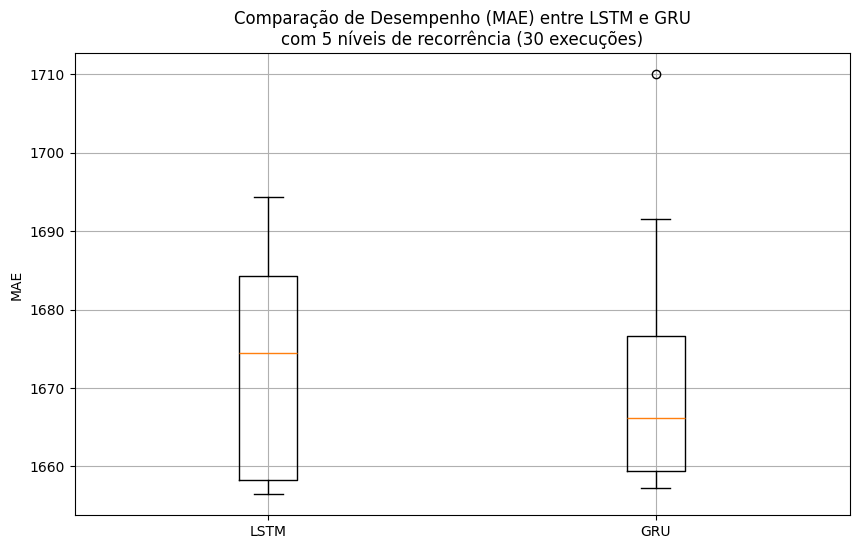

In [ ]:

# Carregar o dataset
df = pd.read_csv('oficialtcld0903.csv')

# Manter apenas TCSacr como entrada e bal75 como saída
df = df[['TCSacr', 'bal75']].dropna()

# Criar janelas temporais (sequências)
def create_sequences(data, target, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(target[i+window_size])
    return np.array(X), np.array(y)

# Função para treinar modelo LSTM ou GRU
def train_model(model_type='LSTM', window_size=10, n_runs=30):
    maes = []
    for _ in tqdm(range(n_runs)):
        X, y = create_sequences(df['TCSacr'].values, df['bal75'].values, window_size)
        X = X.reshape((X.shape[0], X.shape[1], 1))
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

        model = Sequential()
        if model_type == 'LSTM':
            model.add(LSTM(10, input_shape=(window_size, 1)))
        elif model_type == 'GRU':
            model.add(GRU(10, input_shape=(window_size, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mae')

        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
        y_pred = model.predict(X_test).flatten()
        mae = np.mean(np.abs(y_pred - y_test))
        maes.append(mae)

    return maes

# Treinar LSTM e GRU com 10 níveis de recorrência
maes_lstm = train_model(model_type='LSTM', window_size=10, n_runs=30)
maes_gru = train_model(model_type='GRU', window_size=10, n_runs=30)

# Plotar resultados
plt.figure(figsize=(10, 6))
plt.boxplot([maes_lstm, maes_gru], labels=['LSTM', 'GRU'])
plt.ylabel('MAE')
plt.title('Comparação de Desempenho (MAE) entre LSTM e GRU\ncom 10 níveis de recorrência (30 execuções)')
plt.grid(True)
plt.show()


  0%|          | 0/30 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


  3%|▎         | 1/30 [01:55<55:55, 115.70s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


  7%|▋         | 2/30 [03:40<51:04, 109.46s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


 10%|█         | 3/30 [05:27<48:36, 108.03s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 13%|█▎        | 4/30 [07:11<46:08, 106.48s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 17%|█▋        | 5/30 [08:54<43:55, 105.44s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 20%|██        | 6/30 [10:37<41:48, 104.53s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


 23%|██▎       | 7/30 [12:33<41:30, 108.27s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 27%|██▋       | 8/30 [14:17<39:14, 107.02s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


 30%|███       | 9/30 [16:02<37:14, 106.41s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 33%|███▎      | 10/30 [17:49<35:26, 106.30s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 37%|███▋      | 11/30 [19:35<33:41, 106.37s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


 40%|████      | 12/30 [21:21<31:51, 106.18s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 43%|████▎     | 13/30 [23:04<29:50, 105.35s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


 47%|████▋     | 14/30 [24:52<28:16, 106.01s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 50%|█████     | 15/30 [26:36<26:23, 105.54s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 53%|█████▎    | 16/30 [28:21<24:32, 105.21s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 57%|█████▋    | 17/30 [30:06<22:48, 105.24s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 60%|██████    | 18/30 [31:51<21:01, 105.13s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 63%|██████▎   | 19/30 [33:36<19:16, 105.12s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 67%|██████▋   | 20/30 [35:23<17:36, 105.64s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


 70%|███████   | 21/30 [37:08<15:50, 105.62s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 73%|███████▎  | 22/30 [38:53<14:03, 105.45s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 77%|███████▋  | 23/30 [40:39<12:18, 105.54s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 80%|████████  | 24/30 [42:25<10:32, 105.48s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 83%|████████▎ | 25/30 [44:08<08:45, 105.00s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 87%|████████▋ | 26/30 [45:54<07:00, 105.16s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 90%|█████████ | 27/30 [47:38<05:14, 104.78s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


 93%|█████████▎| 28/30 [49:24<03:30, 105.19s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 97%|█████████▋| 29/30 [51:11<01:45, 105.60s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


  0%|          | 0/30 [00:00<?, ?it/s]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


  3%|▎         | 1/30 [03:28<1:41:00, 209.00s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


  7%|▋         | 2/30 [06:35<1:31:17, 195.61s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


 10%|█         | 3/30 [09:50<1:28:02, 195.67s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 13%|█▎        | 4/30 [13:03<1:24:19, 194.58s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


 17%|█▋        | 5/30 [16:25<1:22:04, 196.97s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 20%|██        | 6/30 [19:54<1:20:25, 201.05s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 23%|██▎       | 7/30 [23:15<1:17:05, 201.11s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 27%|██▋       | 8/30 [26:18<1:11:41, 195.52s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 30%|███       | 9/30 [29:31<1:08:06, 194.59s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 33%|███▎      | 10/30 [32:52<1:05:31, 196.58s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 37%|███▋      | 11/30 [36:12<1:02:37, 197.75s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


 40%|████      | 12/30 [39:34<59:43, 199.06s/it]  

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 43%|████▎     | 13/30 [42:47<55:51, 197.12s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 47%|████▋     | 14/30 [46:00<52:11, 195.72s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 50%|█████     | 15/30 [49:12<48:41, 194.75s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 53%|█████▎    | 16/30 [52:33<45:51, 196.52s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


 57%|█████▋    | 17/30 [55:30<41:21, 190.88s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


 60%|██████    | 18/30 [58:51<38:46, 193.87s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


 63%|██████▎   | 19/30 [1:02:04<35:29, 193.63s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 67%|██████▋   | 20/30 [1:05:25<32:37, 195.73s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 70%|███████   | 21/30 [1:08:37<29:11, 194.66s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


 73%|███████▎  | 22/30 [1:11:42<25:32, 191.59s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 77%|███████▋  | 23/30 [1:14:46<22:05, 189.32s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


 80%|████████  | 24/30 [1:18:01<19:05, 191.00s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 83%|████████▎ | 25/30 [1:21:13<15:57, 191.50s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 87%|████████▋ | 26/30 [1:24:43<13:07, 196.88s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 90%|█████████ | 27/30 [1:28:12<10:01, 200.61s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 93%|█████████▎| 28/30 [1:31:08<06:26, 193.18s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 97%|█████████▋| 29/30 [1:34:12<03:10, 190.50s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


100%|██████████| 30/30 [1:37:17<00:00, 194.58s/it]
<ipython-input-7-f5080bf63c64>:44: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([maes_lstm_20, maes_gru_20], labels=['LSTM (20)', 'GRU (20)'])


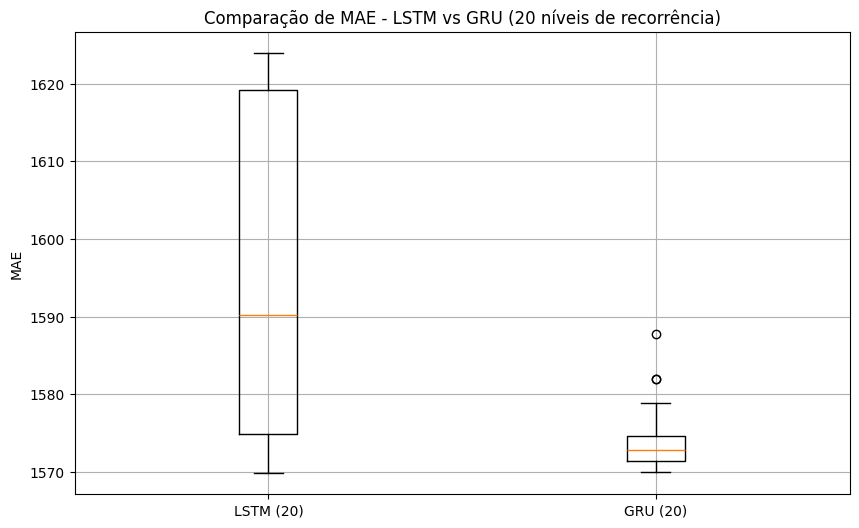

In [ ]:
# Carregar o dataset
df = pd.read_csv('oficialtcld0903.csv')

# Manter apenas TCSacr como entrada e bal75 como saída
df = df[['TCSacr', 'bal75']].dropna()

# Criar janelas temporais (sequências)
def create_sequences(data, target, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(target[i+window_size])
    return np.array(X), np.array(y)

# Função para treinar modelo LSTM ou GRU
def train_model(model_type='LSTM', window_size=20, n_runs=30):
    maes = []
    for _ in tqdm(range(n_runs)):
        X, y = create_sequences(df['TCSacr'].values, df['bal75'].values, window_size)
        X = X.reshape((X.shape[0], X.shape[1], 1))
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

        model = Sequential()
        if model_type == 'LSTM':
            model.add(LSTM(10, input_shape=(window_size, 1)))
        elif model_type == 'GRU':
            model.add(GRU(10, input_shape=(window_size, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mae')

        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
        y_pred = model.predict(X_test).flatten()
        mae = np.mean(np.abs(y_pred - y_test))
        maes.append(mae)

    return maes

# Treinar LSTM e GRU com 20 níveis de recorrência
maes_lstm_20 = train_model(model_type='LSTM', window_size=20)
maes_gru_20 = train_model(model_type='GRU', window_size=20)

# Plotar resultados
plt.figure(figsize=(10, 6))
plt.boxplot([maes_lstm_20, maes_gru_20], labels=['LSTM (20)', 'GRU (20)'])
plt.ylabel('MAE')
plt.title('Comparação de MAE - LSTM vs GRU (20 níveis de recorrência)')
plt.grid(True)
plt.show()


  0%|          | 0/30 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


  3%|▎         | 1/30 [00:51<24:59, 51.69s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


  7%|▋         | 2/30 [02:00<28:46, 61.66s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 10%|█         | 3/30 [02:58<27:01, 60.04s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 13%|█▎        | 4/30 [03:58<25:56, 59.86s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 17%|█▋        | 5/30 [04:57<24:56, 59.87s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 20%|██        | 6/30 [05:54<23:34, 58.92s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 23%|██▎       | 7/30 [06:59<23:16, 60.70s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 27%|██▋       | 8/30 [07:58<22:02, 60.11s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 30%|███       | 9/30 [09:09<22:13, 63.48s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 33%|███▎      | 10/30 [10:29<22:51, 68.58s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 37%|███▋      | 11/30 [11:42<22:13, 70.20s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 40%|████      | 12/30 [12:52<20:59, 69.97s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 43%|████▎     | 13/30 [13:50<18:49, 66.42s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 47%|████▋     | 14/30 [14:49<17:04, 64.04s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 50%|█████     | 15/30 [15:53<16:03, 64.26s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 53%|█████▎    | 16/30 [17:02<15:18, 65.61s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 57%|█████▋    | 17/30 [18:05<14:03, 64.91s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 60%|██████    | 18/30 [19:09<12:55, 64.63s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 63%|██████▎   | 19/30 [20:08<11:29, 62.67s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 67%|██████▋   | 20/30 [21:13<10:34, 63.44s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 70%|███████   | 21/30 [22:22<09:46, 65.14s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 73%|███████▎  | 22/30 [23:16<08:14, 61.76s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 77%|███████▋  | 23/30 [24:08<06:53, 59.02s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 80%|████████  | 24/30 [25:03<05:46, 57.67s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 83%|████████▎ | 25/30 [25:56<04:41, 56.26s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 87%|████████▋ | 26/30 [27:00<03:55, 58.75s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 90%|█████████ | 27/30 [28:00<02:56, 58.85s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 93%|█████████▎| 28/30 [29:11<02:05, 62.60s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 97%|█████████▋| 29/30 [30:11<01:01, 61.88s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


  0%|          | 0/30 [00:00<?, ?it/s]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


  3%|▎         | 1/30 [01:27<42:20, 87.60s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


  7%|▋         | 2/30 [02:51<39:47, 85.26s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 10%|█         | 3/30 [04:24<40:02, 88.98s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 13%|█▎        | 4/30 [05:46<37:21, 86.22s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 17%|█▋        | 5/30 [07:04<34:38, 83.14s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 20%|██        | 6/30 [08:22<32:34, 81.46s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 23%|██▎       | 7/30 [09:44<31:19, 81.73s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 27%|██▋       | 8/30 [11:02<29:29, 80.43s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 30%|███       | 9/30 [12:19<27:45, 79.29s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 33%|███▎      | 10/30 [13:22<24:45, 74.28s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 37%|███▋      | 11/30 [14:49<24:46, 78.24s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 40%|████      | 12/30 [16:21<24:43, 82.39s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 43%|████▎     | 13/30 [17:38<22:53, 80.78s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 47%|████▋     | 14/30 [19:07<22:10, 83.14s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 50%|█████     | 15/30 [20:29<20:42, 82.84s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 53%|█████▎    | 16/30 [21:56<19:39, 84.26s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 57%|█████▋    | 17/30 [23:17<18:01, 83.17s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 60%|██████    | 18/30 [24:35<16:18, 81.57s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 63%|██████▎   | 19/30 [25:53<14:47, 80.72s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 67%|██████▋   | 20/30 [27:25<13:59, 84.00s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 70%|███████   | 21/30 [28:52<12:44, 84.97s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 73%|███████▎  | 22/30 [30:06<10:52, 81.61s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 77%|███████▋  | 23/30 [31:47<10:11, 87.41s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 80%|████████  | 24/30 [33:14<08:44, 87.36s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 83%|████████▎ | 25/30 [34:36<07:09, 85.80s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 87%|████████▋ | 26/30 [36:10<05:52, 88.13s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 90%|█████████ | 27/30 [37:28<04:14, 84.97s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 93%|█████████▎| 28/30 [38:59<02:53, 86.97s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


 97%|█████████▋| 29/30 [40:21<01:25, 85.48s/it]

731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


100%|██████████| 30/30 [41:35<00:00, 83.17s/it]
<ipython-input-8-def652c6c190>:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([maes_lstm_5, maes_gru_5], labels=['LSTM (5)', 'GRU (5)'])


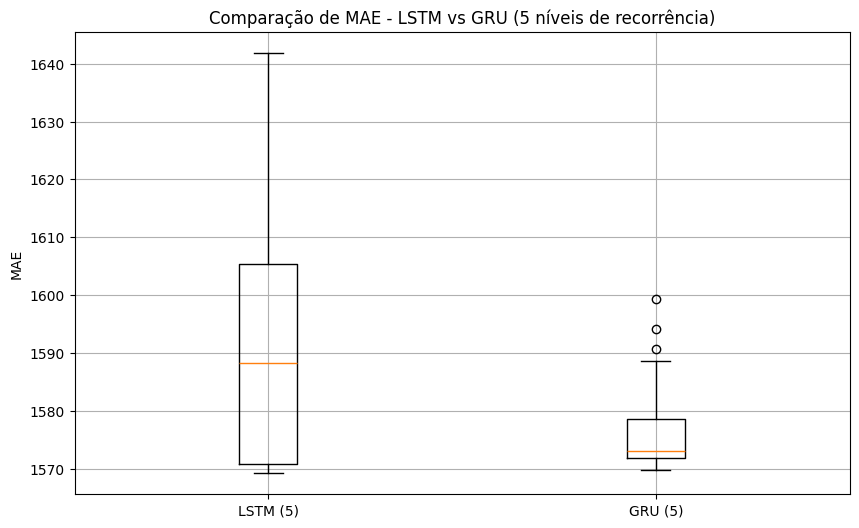

In [ ]:
# Apenas alterando o parâmetro window_size para 5

# Treinar LSTM e GRU com 5 níveis de recorrência
maes_lstm_5 = train_model(model_type='LSTM', window_size=5)
maes_gru_5 = train_model(model_type='GRU', window_size=5)

# Plotar resultados
plt.figure(figsize=(10, 6))
plt.boxplot([maes_lstm_5, maes_gru_5], labels=['LSTM (5)', 'GRU (5)'])
plt.ylabel('MAE')
plt.title('Comparação de MAE - LSTM vs GRU (5 níveis de recorrência)')
plt.grid(True)
plt.show()


In [ ]:

# 1) Carrega o dataset
df = pd.read_csv('oficialtcld0903.csv')
df = df[['TCSacr', 'bal75']].dropna()

# 2) Função para criar sequências com janela fixa
def create_sequences(data, target, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(target[i + window_size])
    return np.array(X), np.array(y)

# 3) Parâmetros gerais
WINDOW_SIZE = 10    # tamanho da janela temporal
N_RUNS = 30         # execuções independentes
EPOCHS = 10
BATCH_SIZE = 32
TEST_SIZE = 0.3

# 4) Dicionário de funções que constroem cada arquitetura
def build_lstm(depth, n_steps):
    model = Sequential()
    # primeira camada com retorno de sequência se depth > 1
    return_sequences = (depth > 1)
    model.add(LSTM(64, return_sequences=return_sequences, input_shape=(n_steps, 1)))
    # camadas intermediárias
    for i in range(depth - 2):
        # todas as intermediárias retornam sequência
        model.add(LSTM(64, return_sequences=True))
    if depth > 1:
        # última camada sem return_sequences
        model.add(LSTM(32))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mae')
    return model

def build_gru(depth, n_steps):
    model = Sequential()
    return_sequences = (depth > 1)
    model.add(GRU(64, return_sequences=return_sequences, input_shape=(n_steps, 1)))
    for i in range(depth - 2):
        model.add(GRU(64, return_sequences=True))
    if depth > 1:
        model.add(GRU(32))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mae')
    return model

architectures = {
    'LSTM_depth2':  lambda: build_lstm(2, WINDOW_SIZE),
    'LSTM_depth5':  lambda: build_lstm(5, WINDOW_SIZE),
    'LSTM_depth10': lambda: build_lstm(10, WINDOW_SIZE),
    'GRU_depth2':   lambda: build_gru(2, WINDOW_SIZE),
    'GRU_depth5':   lambda: build_gru(5, WINDOW_SIZE),
    'GRU_depth10':  lambda: build_gru(10, WINDOW_SIZE),
}

# 5) Função que executa N_RUNS treinamentos e retorna lista de MAEs
def evaluate_architecture(build_fn):
    maes = []
    # prepara uma única vez as sequências
    X_all, y_all = create_sequences(df['TCSacr'].values, df['bal75'].values, WINDOW_SIZE)
    X_all = X_all.reshape((X_all.shape[0], X_all.shape[1], 1))
    for _ in tqdm(range(N_RUNS), desc=build_fn.__name__):
        X_train, X_test, y_train, y_test = train_test_split(
            X_all, y_all, test_size=TEST_SIZE, shuffle=True
        )
        model = build_fn()
        model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
        y_pred = model.predict(X_test).flatten()
        mae = np.mean(np.abs(y_pred - y_test))
        maes.append(mae)
    return maes

# 6) Avalia todas as arquiteturas
results = {}
for name, build_fn in architectures.items():
    print(f'\n=== Avaliando {name} ===')
    results[name] = evaluate_architecture(build_fn)

# 7) Plot comparativo
plt.figure(figsize=(12, 6))
plt.boxplot(
    [results[k] for k in results],
    labels=list(results.keys()),
    vert=True,
    patch_artist=True
)
plt.xticks(rotation=45, ha='right')
plt.ylabel('MAE')
plt.title('Comparação de MAE: LSTM vs GRU com profundidades 2, 5 e 10')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
